# GeneratingMockData1
*David Thomas 2017/01/18*

### Model
For each halo in a fixed 1600 arcmin^2 field of view from the Millennium Simulation catalog we sample from the conditional luminosity distribution and then apply Gaussian noise with variance $\sigma_L$. The result is a pandas dataframe with columns: 'gal_id', 'ra', 'dec', 'mass_h', 'lum'. The PGM for our distribution is rendered below.

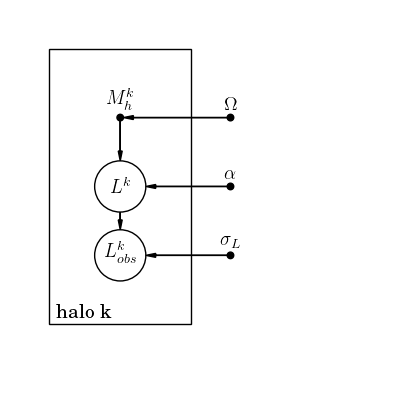

In [7]:
%matplotlib inline

from matplotlib import rc
rc("font", family="serif", size=14)
rc("text", usetex=True)

import daft

pgm = daft.PGM([5, 5], origin=[0, 0])

#dimensions
plate_x = 0.5
plate_y = 1
plate_width = 1.8
plate_height = 3.5
plate_x_center = plate_x + (plate_width / 2.0)
plate_y_fourth = plate_height / 4.0
scale = 1.3

#plate
pgm.add_plate(daft.Plate([plate_x, plate_y, plate_width, plate_height], label="halo k"))

#nodes
pgm.add_node(daft.Node("m_h", "$M_h^k$", plate_x_center, plate_y + 3 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("l", "$L^k$", plate_x_center, plate_y + 2 * plate_y_fourth, scale=scale))
pgm.add_node(daft.Node("l_obs", "$L^k_{obs}$", plate_x_center, plate_y + 1 * plate_y_fourth, scale=scale))

pgm.add_node(daft.Node("sigma_l", "$\sigma_L$", 2*plate_x_center, plate_y + 1 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("alpha", r"$\alpha$", 2*plate_x_center, plate_y + 2 * plate_y_fourth, fixed=True))
pgm.add_node(daft.Node("omega", r"$\Omega$", 2*plate_x_center, plate_y + 3 * plate_y_fourth, fixed=True))

#edges
pgm.add_edge("m_h", "l")
pgm.add_edge("l", "l_obs")
pgm.add_edge("sigma_l", "l_obs")
pgm.add_edge("alpha", "l")
pgm.add_edge("omega", "m_h")

pgm.render()

In [50]:
import pandas as pd
from massinference.angle import Angle

# opening, white-listing, renaming
usecols = ['GalID', 'pos_0[rad]', 'pos_1[rad]', 'M_Subhalo[M_sol/h]']
guo = pd.read_table(
    '/Users/user/Code/Pangloss/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt', 
    usecols=usecols)
print guo.columns
guo.rename(
    columns={'GalID': 'gal_id',
             'pos_0[rad]': 'ra',
             'pos_1[rad]': 'dec',
             'M_Subhalo[M_sol/h]': 'mass_h'
            }, 
    inplace=True)

# central object
ra_c = -0.021112 # rad
dec_c = -0.024584 # rad

# field of view bounds
ra_i = (Angle.from_radian(ra_c) - Angle.from_arcmin(40)).radian
ra_f = (Angle.from_radian(ra_c) + Angle.from_arcmin(40)).radian
dec_i = (Angle.from_radian(dec_c) - Angle.from_arcmin(40)).radian
dec_f = (Angle.from_radian(dec_c) + Angle.from_arcmin(40)).radian

fov = (guo[(guo['ra'] >= ra_i) & (guo['ra'] < ra_f) & (guo['dec'] >= dec_i) & (guo['dec'] < dec_f)]).copy() # fov = field of view

Index([u'GalID', u'pos_0[rad]', u'pos_1[rad]', u'M_Subhalo[M_sol/h]'], dtype='object')


In [51]:
len(fov)

252296

In [53]:
Angle.from_arcmin(40).radian

0.011635528346628864

In [56]:
40. * (1/60.) * (3.14 / 180)

0.01162962962962963

0.02327105669325773

In [58]:
sum((guo['ra'] >= ra_i))

252296

In [60]:
sum((guo['ra'] <= ra_f))

287822

In [61]:
guo['ra'].describe()

count    287822.000000
mean         -0.026113
std           0.005050
min          -0.034898
25%          -0.030429
50%          -0.026116
75%          -0.021708
max          -0.017453
Name: ra, dtype: float64

In [62]:
guo['dec'].describe()

count    287822.000000
mean         -0.026166
std           0.005034
min          -0.034898
25%          -0.030497
50%          -0.026196
75%          -0.021799
max          -0.017453
Name: dec, dtype: float64

In [64]:
(guo['ra'].max() - guo['ra'].min()) * (180/3.14) * 60

60.000878980891713

In [65]:
guo['ra'].max()

-0.017453299999999998

In [66]:
ra_f

-0.009476471653371139

In [67]:
ra_i

-0.03274752834662887

In [68]:
guo['ra'].min()

-0.034897999999999998

In [69]:
guo['dec'].min()

-0.034898100000000001

In [70]:
dec_i

-0.036219528346628865

In [71]:
sum(guo['mass_h'] > 0)

261849